In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

from xgboost import XGBClassifier

In [42]:
df = pd.read_excel("data_modified_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,...,CLTV (Predicted Thou. IDR),service_used,payment_method_churn_rate,location_churn_rate,device_churn_rate,service_churn_rate,device_games_churn_rate,Tenure_Category,CLTV_Category,MonthlyPurchase_Category
0,0,2,Jakarta,Mid End,1,1,0,0,0,0,...,4210.7,2,0.191067,0.26297,0.189591,0.188889,0.094915,Low Tenure,Low CLTV,Medium Monthly Purchase
1,1,2,Jakarta,High End,0,0,0,0,0,0,...,3511.3,0,0.452854,0.26297,0.418928,0.214060,0.493576,Low Tenure,Low CLTV,Medium Monthly Purchase
2,2,8,Jakarta,High End,0,0,1,0,1,1,...,6983.6,3,0.452854,0.26297,0.418928,0.507937,0.493576,Low Tenure,Medium CLTV,High Monthly Purchase
3,3,28,Jakarta,High End,0,0,1,1,1,1,...,6503.9,4,0.452854,0.26297,0.418928,0.289256,0.493576,Medium Tenure,Medium CLTV,High Monthly Purchase
4,4,49,Jakarta,High End,0,1,1,0,1,1,...,6942.0,4,0.167098,0.26297,0.418928,0.392857,0.493576,Medium Tenure,Medium CLTV,High Monthly Purchase


In [43]:
df.drop(["Customer ID", "Latitude", "Longitude"], axis=1, inplace=True)
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,...,CLTV (Predicted Thou. IDR),service_used,payment_method_churn_rate,location_churn_rate,device_churn_rate,service_churn_rate,device_games_churn_rate,Tenure_Category,CLTV_Category,MonthlyPurchase_Category
0,2,Jakarta,Mid End,1,1,0,0,0,0,Digital Wallet,...,4210.7,2,0.191067,0.26297,0.189591,0.188889,0.094915,Low Tenure,Low CLTV,Medium Monthly Purchase
1,2,Jakarta,High End,0,0,0,0,0,0,Pulsa,...,3511.3,0,0.452854,0.26297,0.418928,0.214060,0.493576,Low Tenure,Low CLTV,Medium Monthly Purchase
2,8,Jakarta,High End,0,0,1,0,1,1,Pulsa,...,6983.6,3,0.452854,0.26297,0.418928,0.507937,0.493576,Low Tenure,Medium CLTV,High Monthly Purchase
3,28,Jakarta,High End,0,0,1,1,1,1,Pulsa,...,6503.9,4,0.452854,0.26297,0.418928,0.289256,0.493576,Medium Tenure,Medium CLTV,High Monthly Purchase
4,49,Jakarta,High End,0,1,1,0,1,1,Debit,...,6942.0,4,0.167098,0.26297,0.418928,0.392857,0.493576,Medium Tenure,Medium CLTV,High Monthly Purchase


In [44]:
df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'CLTV (Predicted Thou. IDR)', 'service_used',
       'payment_method_churn_rate', 'location_churn_rate', 'device_churn_rate',
       'service_churn_rate', 'device_games_churn_rate', 'Tenure_Category',
       'CLTV_Category', 'MonthlyPurchase_Category'],
      dtype='object')

In [45]:
# scaler = MinMaxScaler()
# need_scaled = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

# df[need_scaled] = scaler.fit_transform(df[need_scaled])
# df.head()



# commented out because the accuracy is lower than the original

In [46]:
def encode_data(df):
    if df.dtype == "object":
        le = LabelEncoder()
        df = le.fit_transform(df)
    return df

In [47]:
df = df.apply(lambda x: encode_data(x))
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,...,CLTV (Predicted Thou. IDR),service_used,payment_method_churn_rate,location_churn_rate,device_churn_rate,service_churn_rate,device_games_churn_rate,Tenure_Category,CLTV_Category,MonthlyPurchase_Category
0,2,1,2,1,1,0,0,0,0,2,...,4210.7,2,0.191067,0.26297,0.189591,0.188889,0.094915,1,1,2
1,2,1,0,0,0,0,0,0,0,3,...,3511.3,0,0.452854,0.26297,0.418928,0.214060,0.493576,1,1,2
2,8,1,0,0,0,1,0,1,1,3,...,6983.6,3,0.452854,0.26297,0.418928,0.507937,0.493576,1,2,0
3,28,1,0,0,0,1,1,1,1,3,...,6503.9,4,0.452854,0.26297,0.418928,0.289256,0.493576,2,2,0
4,49,1,0,0,1,1,0,1,1,1,...,6942.0,4,0.167098,0.26297,0.418928,0.392857,0.493576,2,2,0


In [48]:
fig = px.bar(df.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [49]:
over = SMOTE(sampling_strategy=1)

X = df.drop(["Churn Label"], axis=1)
y = df["Churn Label"]

In [50]:
X, y = over.fit_resample(X, y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8278, 21), (2070, 21), (8278,), (2070,))

In [52]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)
    
    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)
    
    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    
    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    
    # Evaluate model performance and print results
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

ROC AUC:  84.52%
Model accuracy:  84.54%
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1048
           1       0.85      0.83      0.84      1022

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



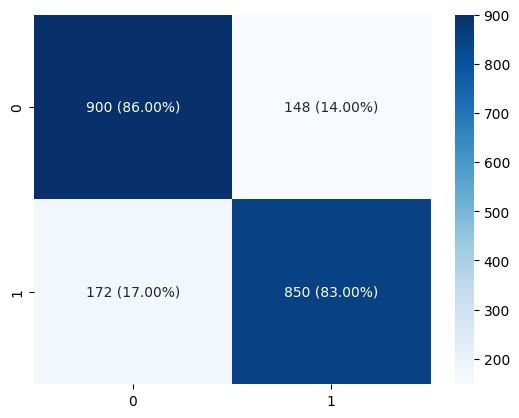

In [53]:
xgb = XGBClassifier()

model(xgb, X_train, y_train, X_test, y_test)

In [54]:
xgb = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.15],
    'n_estimators': [200, 250, 300, 350],
}

grid_clf = GridSearchCV(xgb, param_grid, scoring='roc_auc', cv=3, n_jobs=1, verbose=1)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.9335325320179888


In [55]:
#roc auc score
print(roc_auc_score(y_test, grid_clf.predict(X_test)))

#accuracy score
print(accuracy_score(y_test, grid_clf.predict(X_test)))

0.8428429512555832
0.8429951690821256


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1048
           1       0.85      0.83      0.84      1022

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



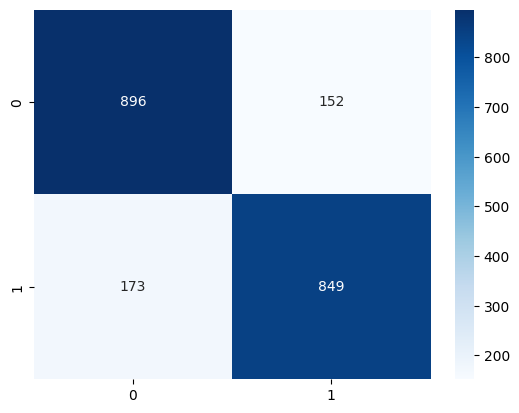

In [56]:
# classification report
print(classification_report(y_test, grid_clf.predict(X_test)))

#confusion matrix
c_matrix = confusion_matrix(y_test, grid_clf.predict(X_test))

#plot confusion matrix
sns.heatmap(c_matrix, annot=True, fmt='', cmap='Blues')

#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, grid_clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()


In [57]:
# feature importance
importance = grid_clf.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)
fig = px.bar(feature_imp, color=feature_imp, title='Feature Importance')
fig.show()